In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')
df_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
df_train['Item_Weight'].describe()
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [27]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


EDA 

In [28]:
import klib
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [29]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()
klib.mv_col_handling(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


GridSpec(6, 5)

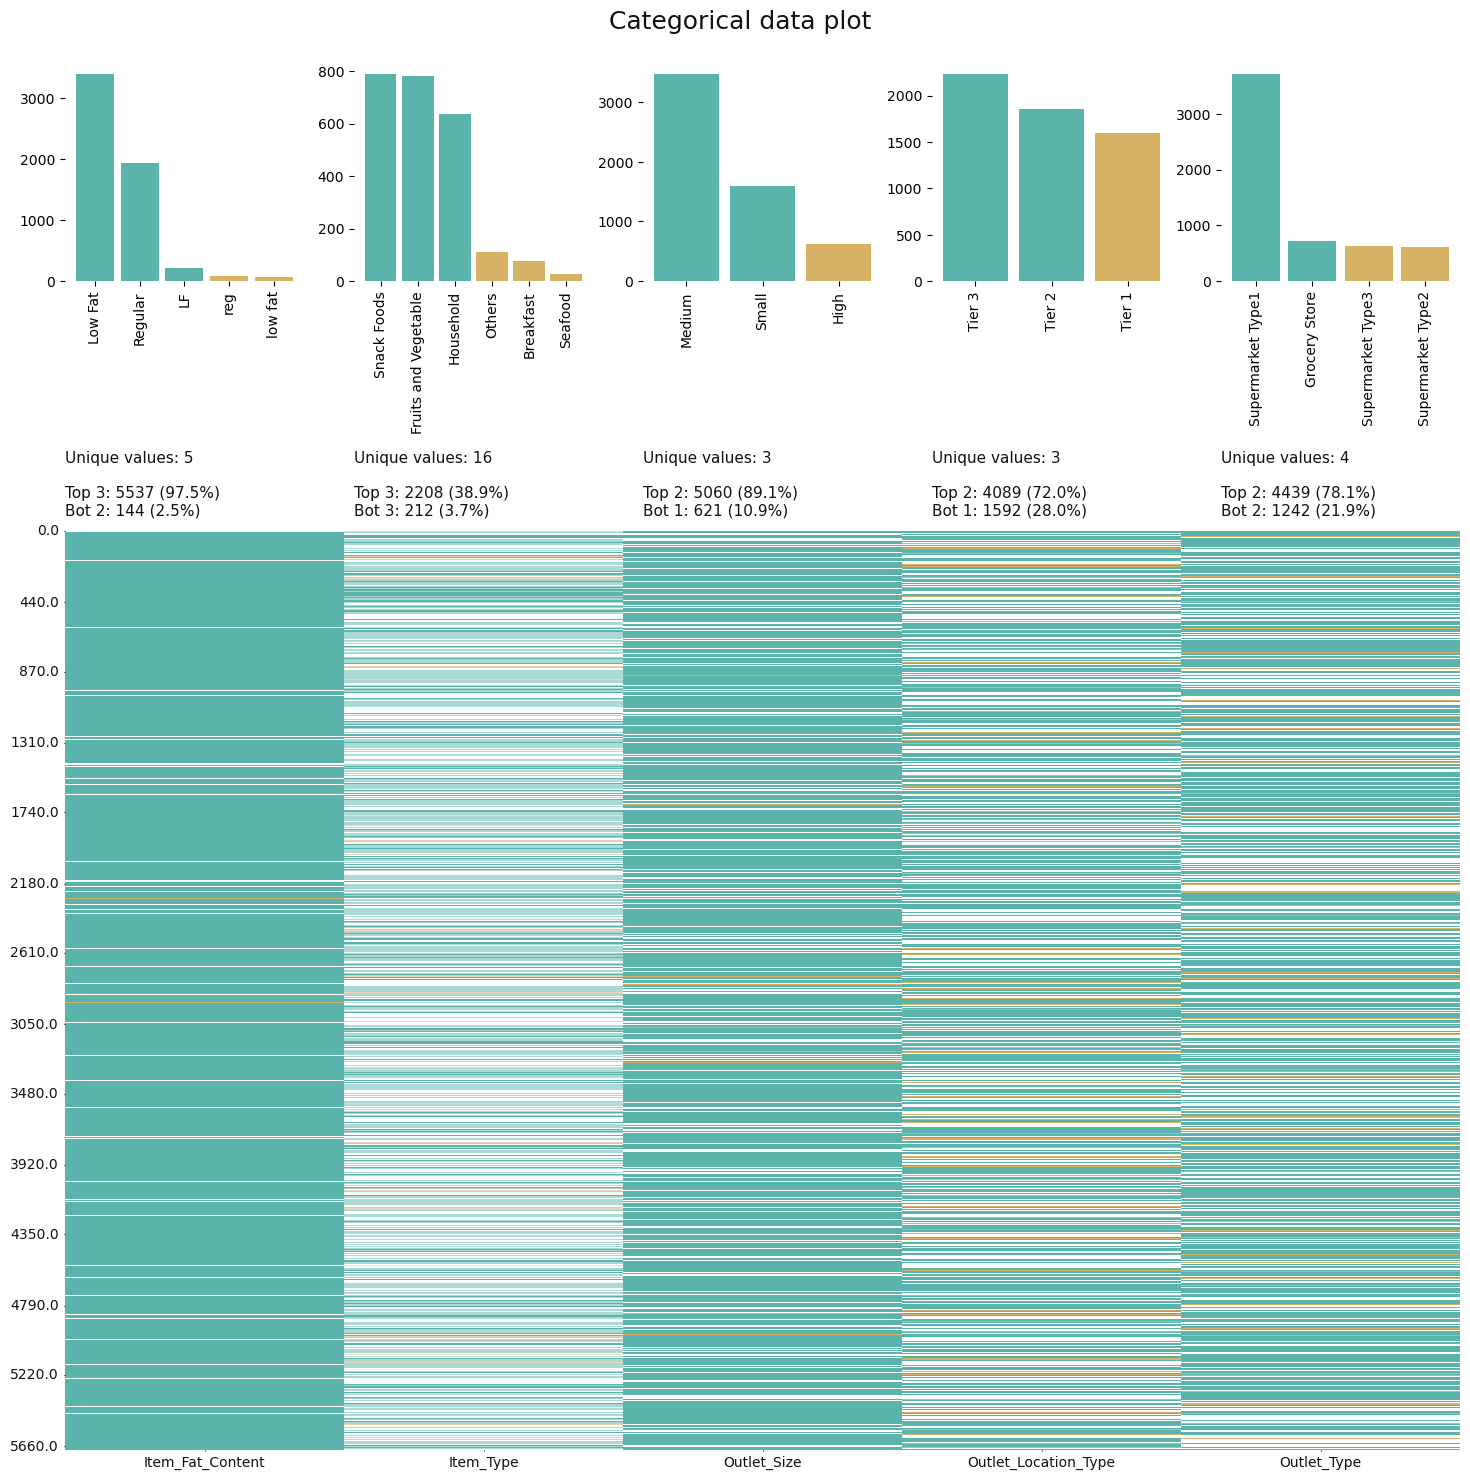

In [36]:
klib.cat_plot(df_test)

<Axes: xlabel='item_weight', ylabel='Density'>

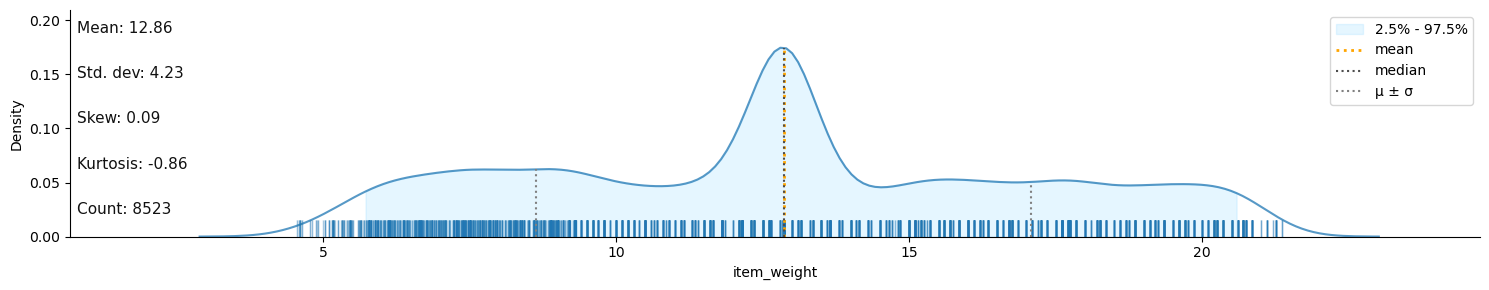

In [37]:
klib.dist_plot(df_train)

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,2,0.046982,0,108.156998,2002,1,1,1,549.284973
8520,10.600000,1,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,2,0.145221,13,103.133202,2009,1,2,2,1845.597656


SPLITTING OF THE DATA SET

In [39]:
X=df_train.drop('item_outlet_sales',axis=1)
Y=df_train['item_outlet_sales']
 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [40]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)
X_train_std

array([[ 1.52290023, -0.57382672,  0.68469731, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.239856  , -0.57382672, -0.09514746, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667619,  0.97378032, -0.0083859 , ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197109, -0.57382672, -0.91916229, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888436,  0.97378032,  1.21363045, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885675, -0.57382672,  1.83915361, ..., -0.28872895,
         1.08786619,  0.98524841]])

REGRESSION MODEL

In [42]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

lr.fit(X_train_std,Y_train)

LinearRegression()

In [43]:
Y_pred_lr=lr.predict(X_test_std)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5041875773270632
880.9999044084498
1162.4412631603454


In [44]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor (n_estimators=1000)


rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [45]:
Y_pred_rf= rf.predict(X_test_std)


print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5470827682103877
782.7198974804808
1111.019644247718


In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gt= GradientBoostingRegressor(n_estimators=100)


gt.fit(X_train_std,Y_train)

GradientBoostingRegressor()

In [47]:
Y_pred_gt= gt.predict(X_test_std)


print(r2_score(Y_test,Y_pred_gt))
print(mean_absolute_error(Y_test,Y_pred_gt))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_gt)))

0.5980555429515577
741.9942149912671
1046.6352026122609


In [48]:
from sklearn.ensemble import HistGradientBoostingRegressor
ht = HistGradientBoostingRegressor()


ht.fit(X_train_std,Y_train)

HistGradientBoostingRegressor()

In [49]:
Y_pred_ht= ht.predict(X_test_std)


print(r2_score(Y_test,Y_pred_ht))
print(mean_absolute_error(Y_test,Y_pred_ht))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_ht)))

0.5689447571659245
763.9940036469801
1083.8739577274723


FINDING BEST MODEL 

In [50]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.550 using {'n_estimators': 1000}
0.511 (0.009) with: {'n_estimators': 10}
0.547 (0.007) with: {'n_estimators': 100}
0.550 (0.005) with: {'n_estimators': 1000}


In [51]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = GradientBoostingRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

grid_search_gradient = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_gradient.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_gradient.best_score_:.3f} using {grid_search_gradient.best_params_}")
means = grid_search_gradient.cv_results_['mean_test_score']
stds = grid_search_gradient.cv_results_['std_test_score']
params = grid_search_gradient.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.585 using {'n_estimators': 100}
0.490 (0.006) with: {'n_estimators': 10}
0.585 (0.001) with: {'n_estimators': 100}
0.508 (0.010) with: {'n_estimators': 1000}


In [52]:

grid_search_gradient.best_score_
Y_pred_rf_grid=grid_search_gradient.predict(X_test_std)
print(r2_score(Y_test,Y_pred_rf_grid))
print(mean_squared_error(Y_test,Y_pred_rf_grid))

0.5980555429515577
1095445.2473472084


In [53]:
grid_search_gradient.best_params_

{'n_estimators': 100}

In [54]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [55]:
grid_search_forest.best_score_

0.5501313849534497

In [56]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)
r2_score(Y_test,Y_pred_rf_grid)
mean_squared_error(Y_test,Y_pred_rf_grid)

1225290.973098565

FEATUREIMPORTANCE ANALYSIS

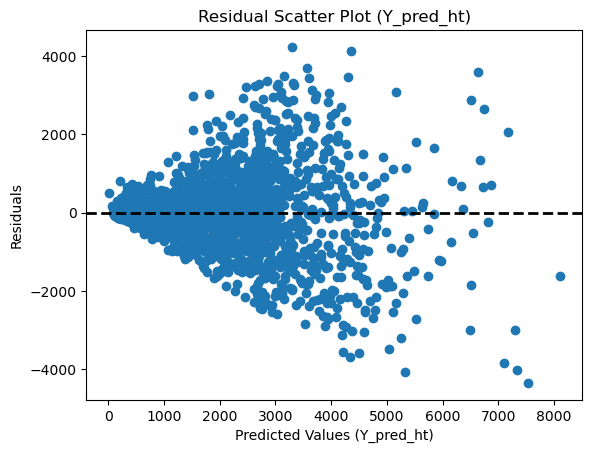

In [60]:
# Calculate residuals for Y_pred_ht
residuals_ht = Y_test - Y_pred_ht

# Residual Scatter Plot for Y_pred_ht
plt.scatter(Y_pred_ht, residuals_ht)
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (Y_pred_ht)')
plt.ylabel('Residuals')
plt.title('Residual Scatter Plot (Y_pred_ht)')
plt.show()


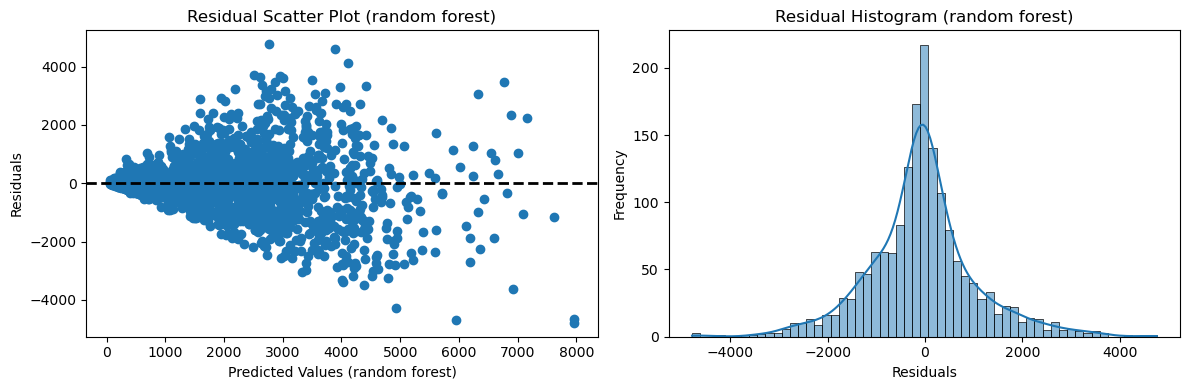

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals for Y_pred_rf
residuals_rf = Y_test - Y_pred_rf

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Residual Scatter Plot for Y_pred_rf
ax1.scatter(Y_pred_rf, residuals_rf)
ax1.axhline(0, color='black', linestyle='--', linewidth=2)
ax1.set_xlabel('Predicted Values (random forest)')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Scatter Plot (random forest)')

# Residual Histogram for Y_pred_rf
sns.histplot(residuals_rf, kde=True, ax=ax2)
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residual Histogram (random forest)')

plt.tight_layout()
plt.show()


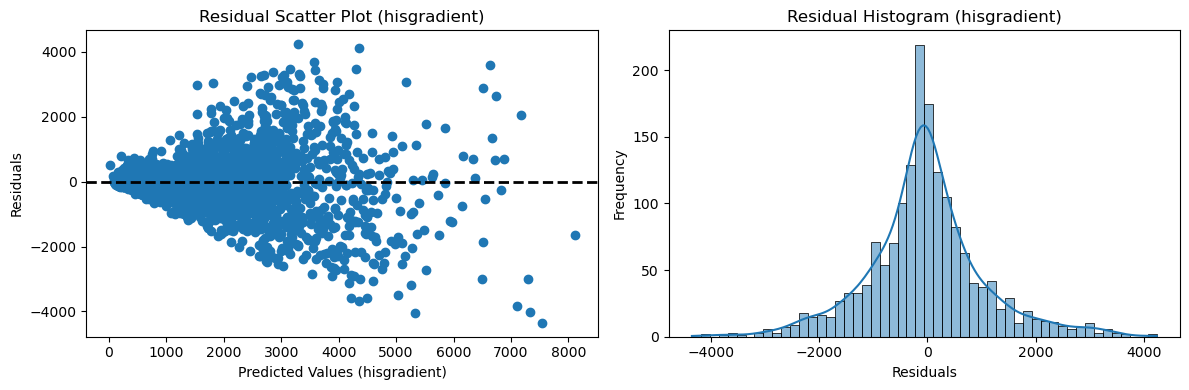

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals for Y_pred_ht
residuals_ht = Y_test - Y_pred_ht

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Residual Scatter Plot for Y_pred_ht
ax1.scatter(Y_pred_ht, residuals_ht)
ax1.axhline(0, color='black', linestyle='--', linewidth=2)
ax1.set_xlabel('Predicted Values (hisgradient)')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Scatter Plot (hisgradient)')

# Residual Histogram for Y_pred_ht
sns.histplot(residuals_ht, kde=True, ax=ax2)
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residual Histogram (hisgradient)')

plt.tight_layout()
plt.show()


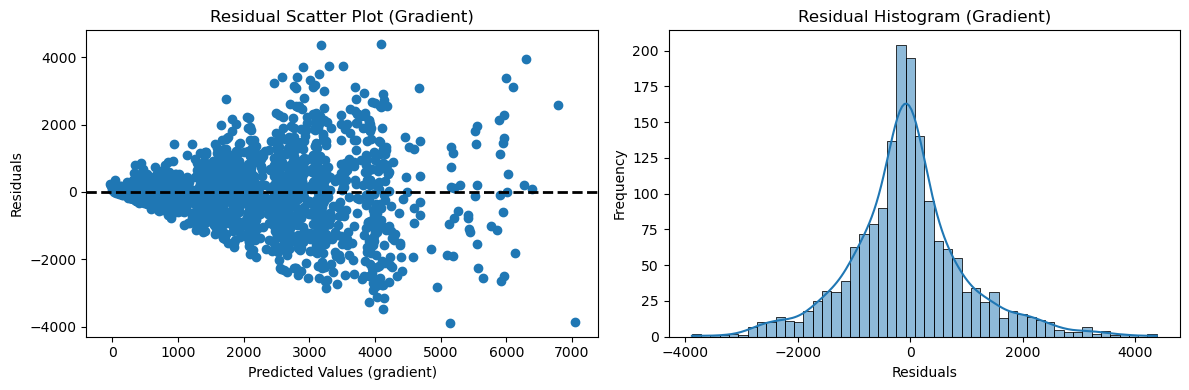

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals for Y_pred_gt
residuals_gt = Y_test - Y_pred_gt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Residual Scatter Plot for Y_pred_gt
ax1.scatter(Y_pred_gt, residuals_gt)
ax1.axhline(0, color='black', linestyle='--', linewidth=2)
ax1.set_xlabel('Predicted Values (gradient)')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Scatter Plot (Gradient)')

# Residual Histogram for Y_pred_gt
sns.histplot(residuals_gt, kde=True, ax=ax2)
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residual Histogram (Gradient)')

plt.tight_layout()
plt.show()


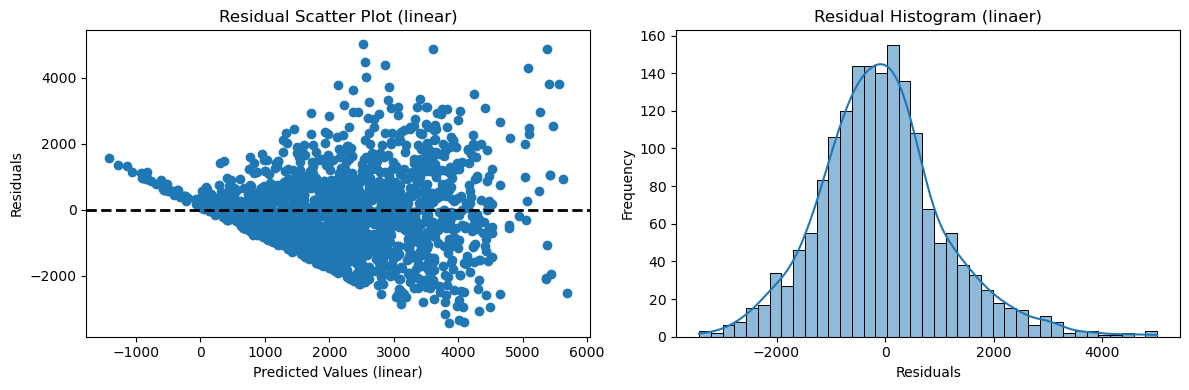

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals for Y_pred_lr
residuals_lr = Y_test - Y_pred_lr

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Residual Scatter Plot for Y_pred_lr
ax1.scatter(Y_pred_lr, residuals_lr)
ax1.axhline(0, color='black', linestyle='--', linewidth=2)
ax1.set_xlabel('Predicted Values (linear)')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual Scatter Plot (linear)')

# Residual Histogram for Y_pred_lr
sns.histplot(residuals_lr, kde=True, ax=ax2)
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Residual Histogram (linaer)')

plt.tight_layout()
plt.show()


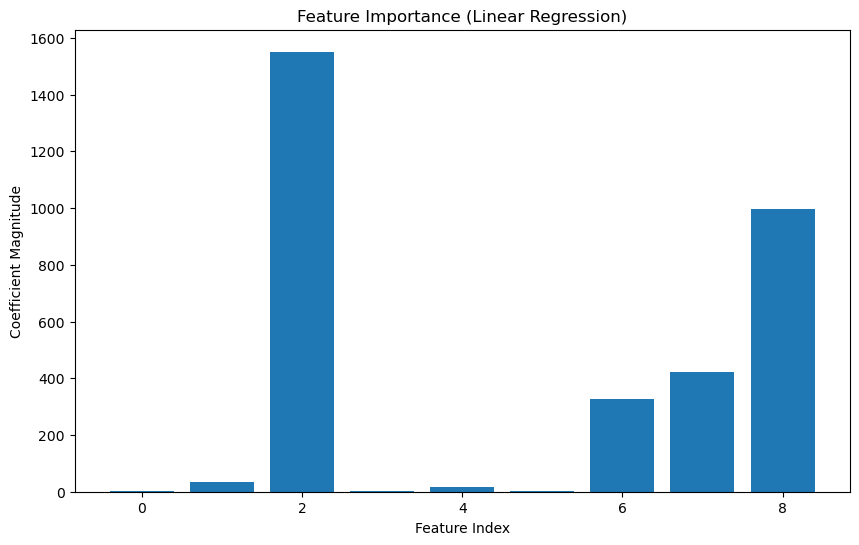

In [65]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get feature coefficients
feature_importance = abs(model.coef_)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance (Linear Regression)')
plt.show()


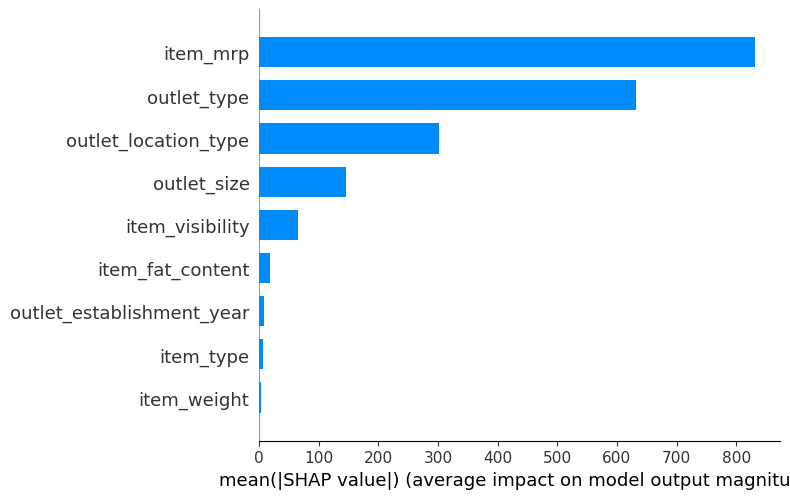

In [66]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summarize feature importance
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns, plot_type='bar')


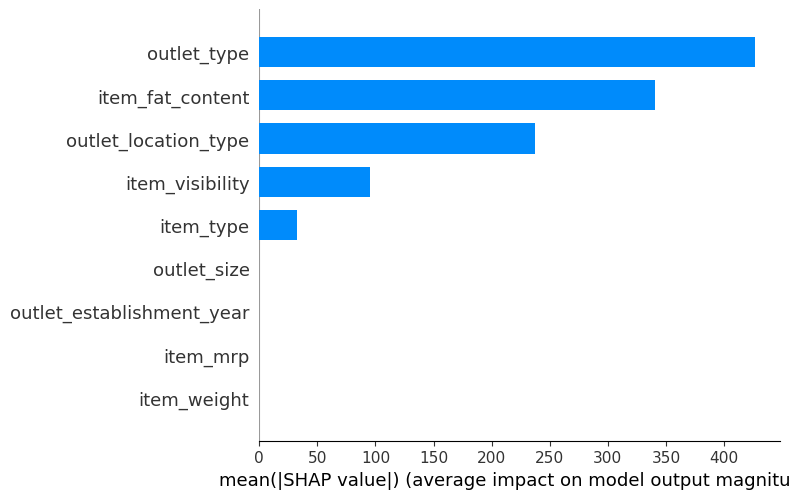

In [67]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(gt, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summarize feature importance
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns, plot_type='bar')


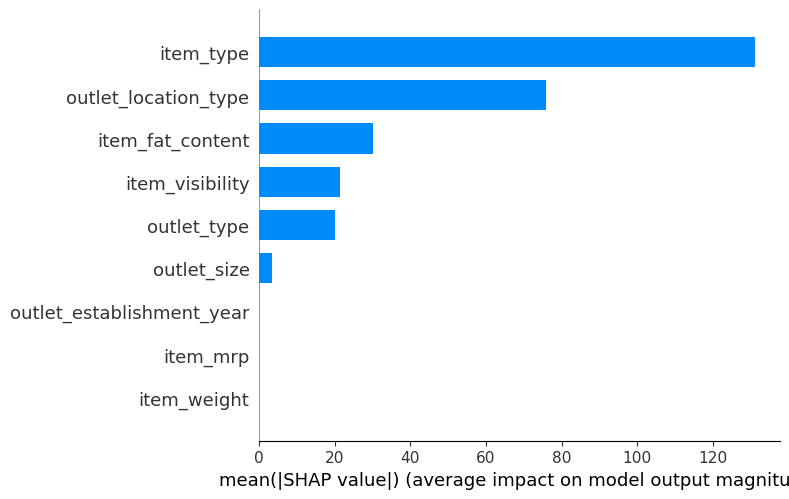

In [68]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(ht, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summarize feature importance
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns, plot_type='bar')
